### This notebook is to get cell intensities from Z-stack to estimate paAIP expression

In [1]:
cd /home/jupyter/Scripts/Suite2p_pipeline/

/home/jupyter/Scripts/Suite2p_pipeline


In [2]:
pwd

'/home/jupyter/Scripts/Suite2p_pipeline'

In [3]:
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import tifffile
from suite2p import registration


No module named 'cellpose'
cannot use anatomical mode, but otherwise suite2p will run normally


In [6]:
# snippet to register a z-stack manually
from utils import utils_imaging, utils_io # these are from suite2p_pipeline
from pathlib import Path
import shutil

# register a given Z-stack and save in temp_dir
z_stack_path = '/home/jupyter/bucket/Data/Calcium_imaging/raw/Bergamo-2P-Photostim/GCaMP_GluSNFR3/anm642301/2023-02-07/stack_00001_00001.tif'
z_stack_path = '/home/jupyter/bucket/Data/temp/ai219/689363/stack_higherpower_00001.tif'
z_stack_path = '/home/jupyter/bucket/Data/Calcium_imaging/testing/gcamp8m-cux2/077017-stack/stack_00001.tif'
z_stack_path = '/home/jupyter/bucket/Data/Calcium_imaging/raw/Bergamo-2P-Photostim/711606-only-mscarlet/stack_00002.tif'
z_stack_path = '/home/jupyter/bucket/Data/Calcium_imaging/raw/Bergamo-2P-Photostim/BCI_69/022624/stack_00001.tif'
z_stack_path = '/home/jupyter/bucket/Data/Calcium_imaging/raw/Bergamo-2P-Photostim/scamp-gcamp/722685/050924/stack-980nm_00001.tif'

paths_to_files = ['Bergamo-2P-Photostim/scamp-gcamp/727495/050924/stack-980nm_00001.tif',
                  'Bergamo-2P-Photostim/scamp-gcamp/727495/050924/stack-980nm_froml2top_00001.tif',
                 'Bergamo-2P-Photostim/scamp-gcamp/722685/050924/stack-980nm_00001.tif']
align_by_channel = 2
for path_to_file in paths_to_files[1:]:
    print(path_to_file)
    z_stack_path = os.path.join('/home/jupyter/bucket/Data/Calcium_imaging/raw/',path_to_file)
    if align_by_channel == 1:
        temp_dir = os.path.join('/home/jupyter/temp/',path_to_file[:-4])
    elif align_by_channel == 2:
        temp_dir = os.path.join('/home/jupyter/temp/',path_to_file[:-4]+'_alignbyred') 
    else:
        print('align by which channeL???? use 1 or 2')
        asd
        
    Path(temp_dir).mkdir(parents=True, exist_ok=True)
    utils_imaging.register_zstack(z_stack_path ,temp_dir,channel_to_use = 1)
    save_dir = os.path.join('/home/jupyter/bucket/Data/Calcium_imaging/suite2p/','/'.join(path_to_file.split('/')[:-1]))
    Path(save_dir).mkdir(parents=True, exist_ok=True)
    if align_by_channel == 1:
        shutil.copyfile(os.path.join(temp_dir,path_to_file.split('/')[-1]),os.path.join(save_dir,z_stack_path.split('/')[-1][:-4]+'_ch1.tif'))
        shutil.copyfile(os.path.join(temp_dir,path_to_file.split('/')[-1][:-4]+'_ch2.tif'),os.path.join(save_dir,z_stack_path.split('/')[-1][:-4]+'_ch2.tif'))
    elif align_by_channel == 2:
        shutil.copyfile(os.path.join(temp_dir,temp_dir.split('/')[-1]+'.tif'),os.path.join(save_dir,z_stack_path.split('/')[-1][:-4]+'_ch1_aligned_by_ch2.tif'))
        shutil.copyfile(os.path.join(temp_dir,temp_dir.split('/')[-1]+'_ch2.tif'),os.path.join(save_dir,z_stack_path.split('/')[-1][:-4]+'_ch2_aligned_by_ch2.tif'))
    
    os.system('rm -r {}'.format(os.path.join(temp_dir,'suite2p')))

Bergamo-2P-Photostim/scamp-gcamp/727495/050924/stack-980nm_froml2top_00001.tif
planes: 45
(45, 200, 2, 800, 800)
(9000, 2, 800, 800)
pixel size changed from [18, 18] to 1.5119717926542364 
regstering /home/jupyter/temp/Bergamo-2P-Photostim/scamp-gcamp/727495/050924/stack-980nm_froml2top_00001_alignbyred/stack-980nm_froml2top_00001.tif
{}
tif
** Found 1 tifs - converting to binary **
360 frames of binary, time 1.40 sec.
720 frames of binary, time 2.20 sec.
1080 frames of binary, time 3.05 sec.
1440 frames of binary, time 4.02 sec.
1800 frames of binary, time 5.17 sec.
2160 frames of binary, time 6.05 sec.
2520 frames of binary, time 6.86 sec.
2880 frames of binary, time 7.90 sec.
3240 frames of binary, time 9.20 sec.
3600 frames of binary, time 11.03 sec.
3960 frames of binary, time 13.51 sec.
4320 frames of binary, time 15.96 sec.
4680 frames of binary, time 18.40 sec.
5040 frames of binary, time 20.84 sec.
5400 frames of binary, time 23.29 sec.
5760 frames of binary, time 27.00 sec.
6

In [10]:
shutil.copyfile(os.path.join(temp_dir,temp_dir.split('/')[-1]+'.tif'),os.path.join(save_dir,z_stack_path.split('/')[-1][:-4]+'_ch1_aligned_by_ch2.tif'))
shutil.copyfile(os.path.join(temp_dir,temp_dir.split('/')[-1]+'_ch2.tif'),os.path.join(save_dir,z_stack_path.split('/')[-1][:-4]+'_ch2_aligned_by_ch2.tif'))

'/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/scamp-gcamp/727495/050924/stack-980nm_00001_ch2_aligned_by_ch2.tif'

In [11]:
for path_to_file in paths_to_files[1:]:
    z_stack_path = os.path.join('/home/jupyter/bucket/Data/Calcium_imaging/raw/',path_to_file)
    temp_dir = os.path.join('/home/jupyter/temp/',path_to_file[:-4]+'_alignbyred') 
    Path(temp_dir).mkdir(parents=True, exist_ok=True)
    utils_imaging.register_zstack(z_stack_path ,temp_dir,channel_to_use = 2)
    save_dir = os.path.join('/home/jupyter/bucket/Data/Calcium_imaging/suite2p/','/'.join(path_to_file.split('/')[:-1]))
    Path(save_dir).mkdir(parents=True, exist_ok=True)
    shutil.copyfile(os.path.join(temp_dir,temp_dir.split('/')[-1]+'.tif'),os.path.join(save_dir,z_stack_path.split('/')[-1][:-4]+'_ch1_aligned_by_ch2.tif'))
    shutil.copyfile(os.path.join(temp_dir,temp_dir.split('/')[-1]+'_ch2.tif'),os.path.join(save_dir,z_stack_path.split('/')[-1][:-4]+'_ch2_aligned_by_ch2.tif'))

    os.system('rm -r {}'.format(os.path.join(temp_dir,'suite2p')))


planes: 45
(45, 200, 2, 800, 800)
(9000, 2, 800, 800)
pixel size changed from [18, 18] to 1.5119717926542364 
regstering /home/jupyter/temp/Bergamo-2P-Photostim/scamp-gcamp/727495/050924/stack-980nm_froml2top_00001_alignbyred/stack-980nm_froml2top_00001.tif
{}
tif
** Found 1 tifs - converting to binary **
360 frames of binary, time 1.41 sec.
720 frames of binary, time 2.21 sec.
1080 frames of binary, time 2.96 sec.
1440 frames of binary, time 3.73 sec.
1800 frames of binary, time 4.49 sec.
2160 frames of binary, time 5.25 sec.
2520 frames of binary, time 6.48 sec.
2880 frames of binary, time 7.81 sec.
3240 frames of binary, time 9.20 sec.
3600 frames of binary, time 11.08 sec.
3960 frames of binary, time 13.55 sec.
4320 frames of binary, time 15.97 sec.
4680 frames of binary, time 18.39 sec.
5040 frames of binary, time 20.91 sec.
5400 frames of binary, time 23.23 sec.
5760 frames of binary, time 26.57 sec.
6120 frames of binary, time 30.26 sec.
6480 frames of binary, time 34.01 sec.
68

OSError: [Errno 28] No space left on device

In [17]:
from pathlib import Path
Path('/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/paAIP2-red-green-crosstalk/BCI_69/02262024').mkdir(parents=True, exist_ok=True)

In [19]:
import shutil

shutil.copyfile('/home/jupyter/temp/gcamp_only/gcamp_only.tif','/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/paAIP2-red-green-crosstalk/BCI_69/02262024/zstack.tif')
shutil.copyfile('/home/jupyter/temp/gcamp_only/gcamp_only_ch2.tif','/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/paAIP2-red-green-crosstalk/BCI_69/02262024/zstack_ch2.tif')

'/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/paAIP2-red-green-crosstalk/BCI_69/02262024/zstack_ch2.tif'

In [56]:
# code to calculate red-green crosstalk pixel-wise
green_stack_file  ='/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/paAIP2-red-green-crosstalk/711606/02192024/zstack.tif'
red_stack_file  ='/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/paAIP2-red-green-crosstalk/711606/02192024/zstack_ch2.tif'


# green_stack_file = '/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/BCI_69/FOV_03/Z-stacks/BCI_69_121123_stack_00001.tif'
# red_stack_file = '/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/BCI_69/FOV_03/Z-stacks/ch_2/BCI_69_121123_stack_00001_ch2.tif'

# green_stack_file = '/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/BCI_69/FOV_03/Z-stacks/BCI_69_120623_stack_00001.tif'
# red_stack_file = '/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/BCI_69/FOV_03/Z-stacks/ch_2/BCI_69_120623_stack_00001_ch2.tif'

# green_stack_file = '/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/BCI_69/FOV_03/Z-stacks/BCI_69_120523_stack_00001.tif'
# red_stack_file = '/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/BCI_69/FOV_03/Z-stacks/ch_2/BCI_69_120523_stack_00001_ch2.tif'

# green_stack_file = '/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/paAIP2-red-green-crosstalk/BCI_69/02262024/zstack.tif'
# red_stack_file = '/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/paAIP2-red-green-crosstalk/BCI_69/02262024/zstack_ch2.tif'

green_stack = tifffile.imread(green_stack_file)
red_stack = tifffile.imread(red_stack_file)

In [57]:
import scipy
slopes = []
offsets = []
for plane_i, (green_plane, red_plane) in enumerate(zip(green_stack,red_stack)):
    green_plane = scipy.ndimage.gaussian_filter(green_plane,[3,3])
    red_plane = scipy.ndimage.gaussian_filter(red_plane,[3,3])
    x= red_plane.flatten()
    y = green_plane.flatten()
    
    needed = x>np.percentile(x,75)
    p = np.polyfit(x[needed],y[needed],1)
    slopes.append(p[0])
    offsets.append(p[1])
    #ass
    

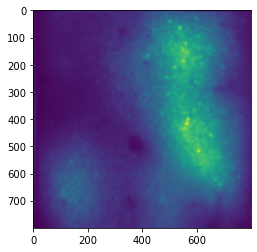

In [60]:
plt.imshow(red_plane)

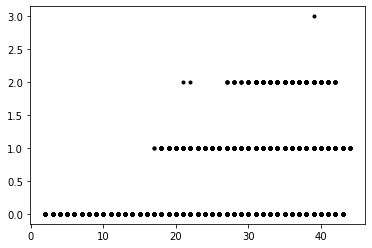

In [44]:
plt.plot(x,y,'k.')

Text(0, 0.5, 'green to red crosstalk (slope)')

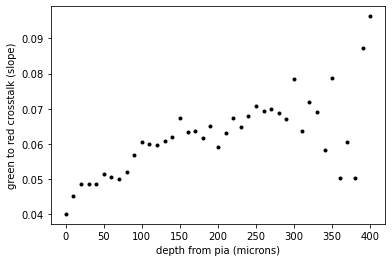

In [55]:
plt.plot(np.arange(len(slopes))*10,slopes,'k.')
plt.xlabel('depth from pia (microns)')
plt.ylabel('green to red crosstalk (slope)')

Text(0, 0.5, 'red to green crosstalk (slope)')

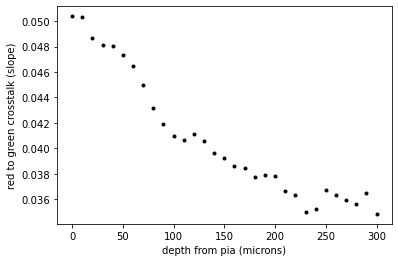

In [58]:
plt.plot(np.arange(len(slopes))*10,slopes,'k.')
plt.xlabel('depth from pia (microns)')
plt.ylabel('red to green crosstalk (slope)')

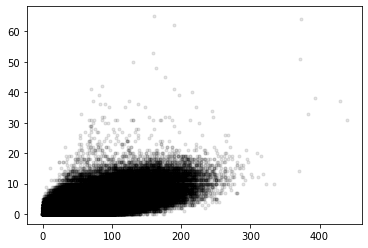

In [13]:
plt.plot(red_plane.flatten(),green_plane.flatten(),'k.',alpha = .1)

In [ ]:
# this code has been included in the main script - with modifications
subject = 'BCI_78'
fov = 'FOV_01'

s2p_base_dir = '/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim'


files = os.listdir(os.path.join(s2p_base_dir,subject,fov))
sessions = []
for file in files:
    if '.' not in file and 'Z-stack' not in file:
        sessions.append(file)
sessions = np.sort(sessions)
for session in sessions:
    fov_dir = os.path.join(s2p_base_dir,subject,fov)





    F0 = np.load(os.path.join(fov_dir,session,'F0.npy'))
    F0_scalar =np.nanmedian(F0,1)
    # open z-stack for the session, load cell masks
    with open(os.path.join(fov_dir,session,'s2p_params.json'), 'r') as f:
        s2p_params_dict = json.load(f)
    z_stack_name = s2p_params_dict['z_stack_name']
    z_stack_name_ch_2 = s2p_params_dict['z_stack_name'][:-4]+'_ch2.tif'
    z_stack_dict = np.load(os.path.join(fov_dir,'z_stack_correlations.npy'),allow_pickle=True).tolist()
    mean_z_similarity = z_stack_dict[z_stack_name[:-4]]['sessions'][session]


    stack = tifffile.imread(os.path.join(fov_dir,'Z-stacks',z_stack_name))
    stack_ch_2 = tifffile.imread(os.path.join(fov_dir,'Z-stacks','ch_2',z_stack_name_ch_2))
    needed_plane = np.argmax(mean_z_similarity)

    stack_plane = stack[needed_plane,:,:].squeeze()
    stack_plane_ch_2 = stack_ch_2[needed_plane,:,:].squeeze()

    session_meanimg_dict = np.load(os.path.join(fov_dir,session,'meanImg.npy'),allow_pickle=True)#.tolist()
    session_meanimg = np.nanmean(np.asarray(session_meanimg_dict),0).squeeze()
    try:
        cell_masks = np.load(os.path.join(fov_dir,session,'cell_masks.npy'),allow_pickle=True)#.tolist()
    except:
        cell_masks = np.load(os.path.join(fov_dir,'cell_masks.npy'),allow_pickle=True)#.tolist()


    ops = np.load(os.path.join(fov_dir,session,'ops.npy'),allow_pickle = True).tolist()
    ops['yblock'], ops['xblock'], ops['nblocks'], ops['block_size'], ops['NRsm'] = registration.register.nonrigid.make_blocks(Ly=ops['Ly'], Lx=ops['Lx'], block_size=[64,64])#ops['block_size'])
    ops['nframes'] = 1 
    ops['batch_size']=2 

    # register correct Z-stack plane to session image
    maskMulNR, maskOffsetNR, cfRefImgNR = registration.register.nonrigid.phasecorr_reference(refImg0=session_meanimg,
                                                                                             maskSlope=ops['spatial_taper'] if ops['1Preg'] else 3 * ops['smooth_sigma'], # slope of taper mask at the edges
                                                                                             smooth_sigma=ops['smooth_sigma'],
                                                                                             yblock=ops['yblock'],
                                                                                             xblock=ops['xblock'])
    ymax1, xmax1, cmax1 = registration.register.nonrigid.phasecorr(data=np.complex64(np.float32(np.array([stack_plane]*2))),
                                                                                              maskMul=maskMulNR.squeeze(),
                                                                                              maskOffset=maskOffsetNR.squeeze(),
                                                                                              cfRefImg=cfRefImgNR.squeeze(),
                                                                                              snr_thresh=ops['snr_thresh'],
                                                                                              NRsm=ops['NRsm'],
                                                                                              xblock=ops['xblock'],
                                                                                              yblock=ops['yblock'],
                                                                                              maxregshiftNR=ops['maxregshiftNR'])


    registered_zstack_imgs = registration.register.nonrigid.transform_data(data=np.float32(np.stack([stack_plane,stack_plane_ch_2])),
                                                                          nblocks=ops['nblocks'],
                                                                          xblock=ops['xblock'],
                                                                          yblock=ops['yblock'],
                                                                          ymax1=ymax1,
                                                                          xmax1=xmax1,
                                                                          )
    # extract Z-stack mean fluorescence values
    stack_val_green = []
    stack_val_red = []
    for cell_i in range(cell_masks.shape[0]):
        stack_val_green.append(np.sum(registered_zstack_imgs[0].flatten()[cell_masks[cell_i][0]]*cell_masks[cell_i][1]))
        stack_val_red.append(np.sum(registered_zstack_imgs[1].flatten()[cell_masks[cell_i][0]]*cell_masks[cell_i][1]))
    stack_val_green = np.asarray(stack_val_green)
    stack_val_red = np.asarray(stack_val_red)

    # find the cells that are not active during the Z-stack
    ratio_vals = stack_val_green/F0_scalar
    needed = ratio_vals < np.percentile(ratio_vals[np.isnan(ratio_vals)==False],50)
    p = np.polyfit(F0_scalar[needed],stack_val_green[needed],1)
    stack_val_green_corrected = np.polyval(p,F0_scalar)
    relative_expression = stack_val_red/stack_val_green_corrected
    relative_expression[relative_expression<0] = 0

    red_intensity_dict = {'red_intensity_normalized':relative_expression,
                          'red_intensity_raw':stack_val_red,
                          'green_intensity_raw':stack_val_green,
                          'green_intensity_activity_corrected':stack_val_green_corrected}
    np.save(os.path.join(fov_dir,session,'z_stack_intensities.npy'),red_intensity_dict)



/home/jupyter/Scripts/suite2p/suite2p/registration/nonrigid.py:180: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[:,n] = data[:, yind[0]:yind[-1], xind[0]:xind[-1]]


In [121]:
d = np.load(os.path.join(fov_dir,session,'z_stack_intensities.npy'),allow_pickle = True).tolist()

In [122]:
d.keys()

dict_keys(['red_intensity_normalized', 'red_intensity_raw', 'green_intensity_raw', 'green_intensity_activity_corrected'])

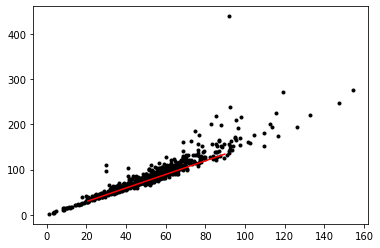

In [107]:

plt.plot(F0_scalar,stack_val_green,'k.')
xvals = np.percentile(F0_scalar,[5,95])
plt.plot(xvals,np.polyval(p,xvals),'r-')

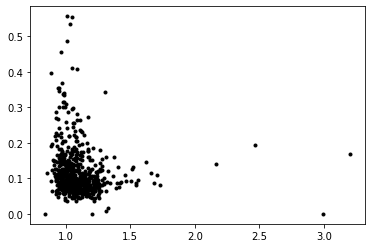

In [116]:
plt.plot(stack_val_green/stack_val_green_corrected,relative_expression,'k.')

as


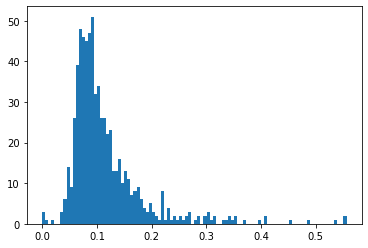

In [114]:

plt.hist(relative_expression,100)
print('as')

(2, 800, 800)

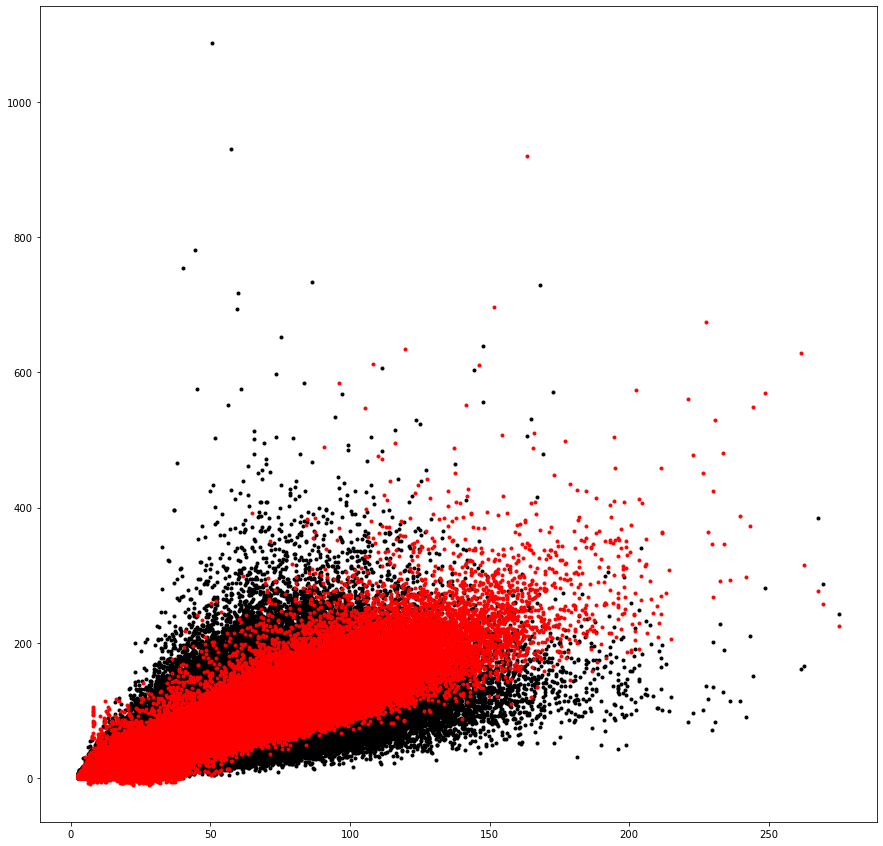

In [75]:
fig = plt.figure(figsize = [15,15])
plt.plot(session_meanimg.flatten(),stack_plane.flatten(),'k.')
plt.plot(session_meanimg.flatten(),registered_zstack_imgs[0,:,:].flatten(),'r.')
#plt.imshow(registered_zstack_imgs[1,:,:]-stack_plane_ch_2)

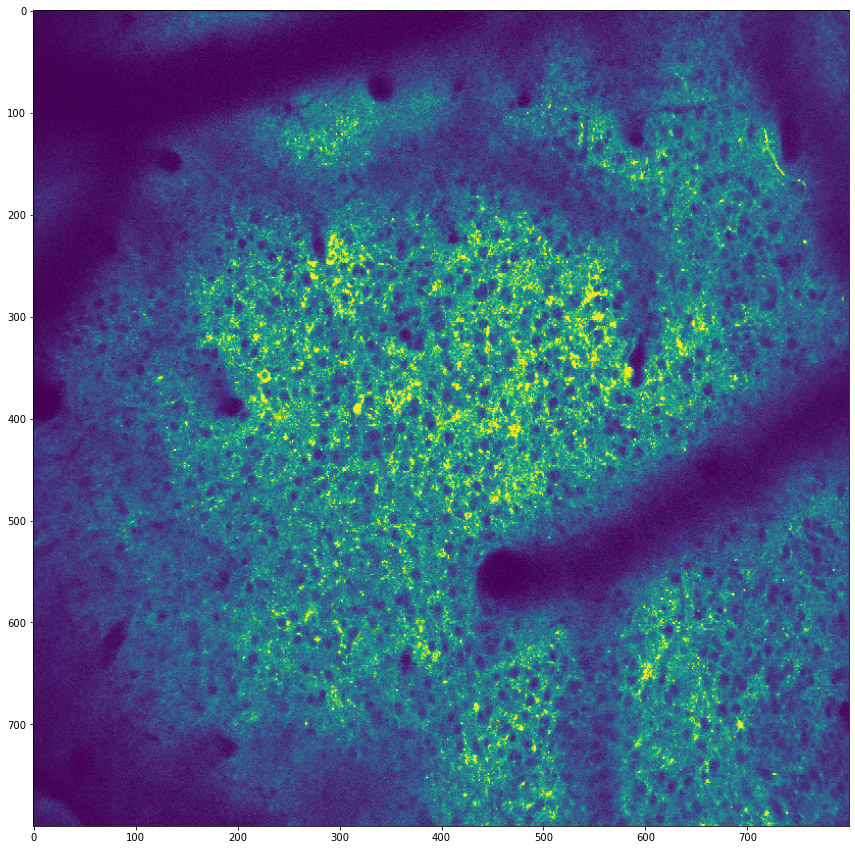

In [48]:
fig = plt.figure(figsize = [15,15])
im = plt.imshow(stack_plane)
im.set_clim([0,200])

In [37]:
stack.shape

(21, 800, 800)